In [13]:
#Importing Pandas for data manipulations
#numpy for working with arrays and use it library for tranforms works.
#matplot for ploting graphs and seaborn for statistical analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sb

In [2]:
#lets import the data set
housing_data = pd.read_csv("~/Downloads/housing.csv")

In [3]:
#to check few rows of data on the csv file
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#to check the number of rows and columns
housing_data.shape

(20640, 10)

In [6]:
#the data set CSV files has 20640 rows and 10 columns.

#lets findout if there is any missing data in the file.

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#from the output we can see that total_bedrooms has 207 data missing.

#this null fields can be filled using python function called fillna()

#by calculating median value of total_bedrooms column.

median = housing_data['total_bedrooms'].median()
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(median)

In [9]:
#now check the info of the dataset again
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#there is no null values now.

#from the info we can see that, ocean_proximity is the one field we can use to categorize the house.

#that how closer each house closer to the beach. Normally the more closer to the beach the costlier it would be.

#so lets count that field data too see how many houses closer to beach or away from it.

housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
#ok, now lets get the overview of our dataset to understand it futher by using the describe() method.
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


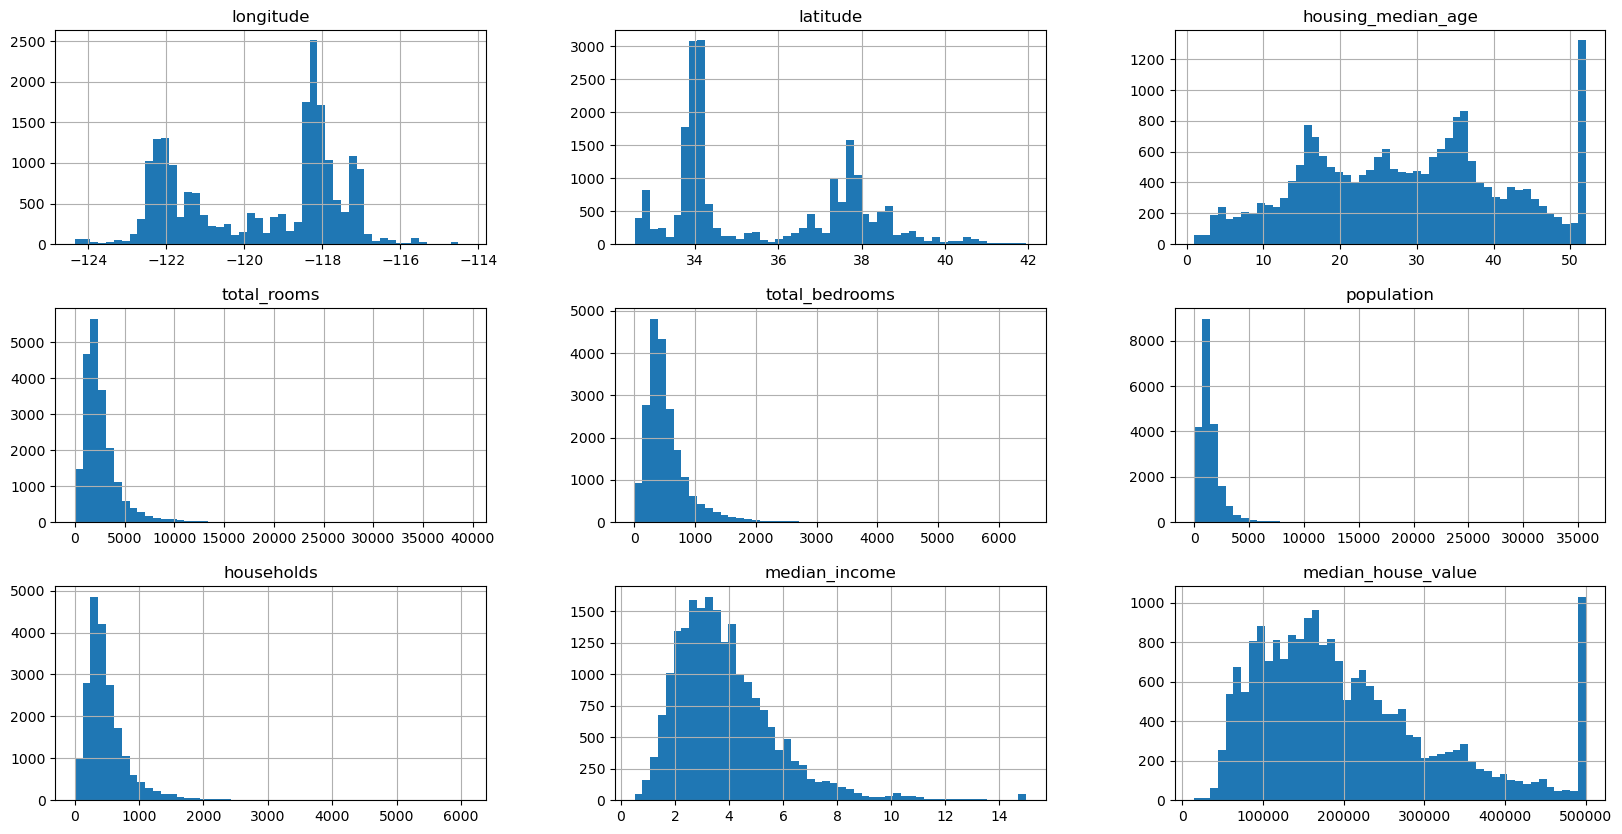

In [14]:
#here we can see the min and max value of the median_house_value which is 14999 to 500001.

#Note:- Ocean proximity field is not numerical data hence its not taken by the describe() method.

#we can use sklearn library to numarize it later

#lets visualise the dataset to understand it further using matplot library

housing_data.hist(bins=50, figsize=(20, 10))
mplt.show()

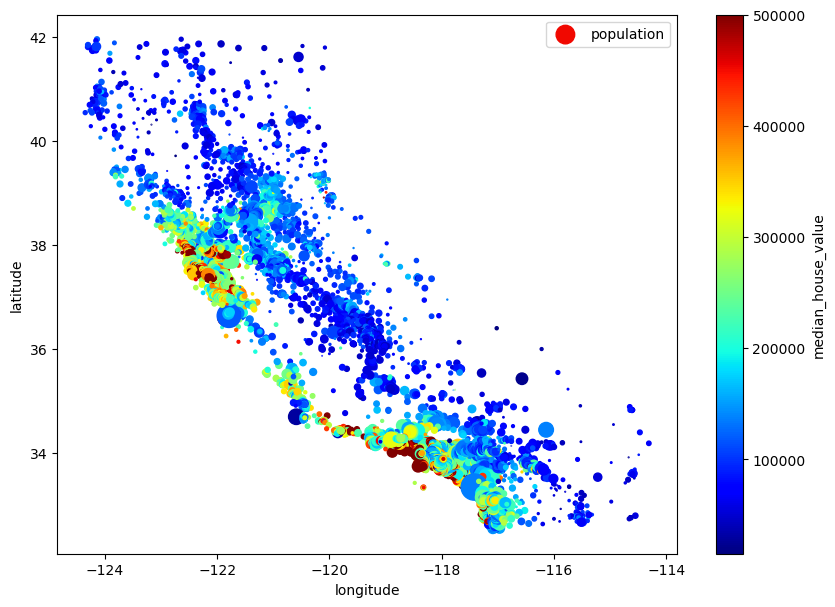

In [16]:
#lets check the media_house_value graph. 
#it shows there are more numbers of house between the prices 100000 to 200000.
#and fewer house are priced high.

#lets plot one more map to show the house price based on the lat and lang, polulation density
housing_data.plot(kind="scatter", x="longitude", y="latitude", 
                  s=housing_data['population']/100, label="population", 
                  figsize=(10, 7), c="median_house_value", cmap=mplt.get_cmap('jet'), colorbar=True)
mplt.show()

In [19]:
#we can see "median_house_value" based on "longitude" and "latitude", 
#with marker size representing "population" and color representing "median_house_value". 
#It includes a colorbar and uses "jet" colormap

y = housing_data["median_house_value"]
housing_data.drop("median_house_value", axis=1, inplace=True)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(housing_data, y, test_size=0.2, random_state=42)
print("Training dataset size:", x_train.shape)
print("Test dataset size:", x_test.shape)

Training dataset size: (16512, 9)
Test dataset size: (4128, 9)


In [40]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit(x_train["ocean_proximity"].values)
x_train_op_lb =  encoder.transform(x_train["ocean_proximity"].values)
x_test_op_lb = encoder.transform(x_test["ocean_proximity"].values)

print("x_train_op_lb:", x_train_op_lb.shape)
print("x_test_op_lb:", x_test_op_lb.shape)

x_train_op_lb: (16512, 5)
x_test_op_lb: (4128, 5)


In [41]:
from sklearn.preprocessing import StandardScaler
x_train_num = x_train.drop("ocean_proximity", axis = 1)
x_test_num = x_test.drop("ocean_proximity", axis = 1)
standardscaler = StandardScaler()
standardscaler.fit(x_train_num)
x_train_num_ss = standardscaler.transform(x_train_num)
x_test_num_ss = standardscaler.transform(x_test_num)

print("x_train_num_ss_shape:", x_train_num_ss.shape)
print("x_test_num_ss_shape:", x_test_num_ss.shape)

x_train_num_ss_shape: (16512, 8)
x_test_num_ss_shape: (4128, 8)


In [42]:
x_tr = np.hstack((x_train_num_ss, x_train_op_lb))
x_ts = np.hstack((x_test_num_ss, x_test_op_lb))

In [43]:
x_tr

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
x_ts

array([[ 0.28534728,  0.1951    , -0.28632369, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42487026,  1.00947776,  1.85617335, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.        ,
         0.        ,  0.        ],
       [-0.08860699,  0.52740357,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.60445493, -0.66608108, -0.92113763, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
x_tr.shape

(16512, 13)

In [46]:
x_ts.shape

(4128, 13)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
for_reg = RandomForestRegressor()
for_reg.fit(x_tr, y_train)

predictions = for_reg.predict(x_tr)
msme = mean_squared_error(predictions, y_train)
rsme = np.sqrt(msme)
rsme

18202.02359925946